# Часть 1. Предобработка текста и классификация

In [1]:
import warnings
warnings.filterwarnings('ignore')

### Прочитайте текст в файлах positive.txt и negative.txt

In [2]:
with open("positive.txt", "r", encoding="utf-8") as file:
    positive_plain = file.read()

with open("negative.txt", "r", encoding="utf-8") as file:
    negative_plain = file.read()

In [3]:
print(positive_plain[:400], negative_plain[:400], sep="\n\n")

@first_timee хоть я и школота, но поверь, у нас то же самое :D общество профилирующий предмет типа). Да, все-таки он немного похож на него Но мой мальчик все равно лучше:D. RT @KatiaCheh: Ну ты идиотка) я испугалась за тебя!!!. RT @digger2912: "Кто то в углу сидит и погибает от голода, а мы ещё 2 порции взяли, хотя уже и так жрать не хотим" :DD . @irina_dyshkant Вот что значит страшилка :D

Но бли

на работе был полный пиддес :| и так каждое закрытие месяца, я же свихнусь так D:. Коллеги сидят рубятся в Urban terror, а я из-за долбанной винды не могу :(. @elina_4post как говорят обещаного три года ждут((. Желаю хорошего полёта и удачной посадки,я буду очень сильно скучать( . Обновил за каким-то лешим surf, теперь не работает простоплеер :(. Котёнка вчера носик разбила, плакала и расстраивала


### Разбейте данные на предложения

Для токенизации используйте nltk.sent_tokenize. чтобы удалить имен пользователей из сообщений напишите регулярное выражение.

<b>Классы символов в регулярных выражениях</b>:

[A-Z] – символы верхнего регистра (латиница)

[a-z] – символы нижнего регистра (латиница)

[А-Я] – символы верхнего регистра (кириллица)

[а-я] – символы нижнего регистра (кириллица)

[0-9] или \d – цифра

[^0-9] или \D – любой символ, кроме цифры

. – Один любой символ, кроме новой строки \n.

? – 0 или 1 вхождение шаблона слева

\+ – 1 и более вхождений шаблона слева

\* – 0 и более вхождений шаблона слева

\w – Любая цифра или буква (\W — все, кроме буквы или цифры)

\d – Любая цифра [0-9] (\D — все, кроме цифры)

\s – Любой пробельный символ (\S — любой непробельнй символ)

\b – Граница слова

[..] – дин из символов в скобках ([^..] — любой символ, кроме тех, что в скобках)

\ – Экранирование специальных символов (\. означает точку или \+ — знак «плюс»)

^ и $ – Начало и конец строки соответственно

{n,m} – От n до m вхождений ({,m} — от 0 до m)

a|b – Соответствует a или b

() – Группирует выражение и возвращает найденный текст

\t, \n, \r – Символ табуляции, новой строки и возврата каретки соответственно

In [10]:
import re
from nltk import sent_tokenize


def split_data(text):
    # Избавляемся от имен пользователей, указанных в письмах
    name = re.compile("@\S+:?")
    res = name.sub("", text)
    # Удалите лишние переносы строк и разбейте на предложения по знаку "."
    res = sent_tokenize(res.replace("\n", ""))
    return res

In [12]:
positive = split_data(positive_plain)
negative = split_data(negative_plain)

In [13]:
len(positive), len(negative)

(5667, 5803)

In [16]:
positive[0]

' хоть я и школота, но поверь, у нас то же самое :D общество профилирующий предмет типа).'

In [17]:
pos_labels = [1] * len(positive)

In [18]:
neg_labels = [0] * len(negative)

Объединим все в один список

In [19]:
all_text = positive + negative
all_labels = pos_labels + neg_labels

In [20]:
len(all_text)

11470

### Предварительный анализ коллекции

#### Средняя длина предложений

In [21]:
import pandas as pd

In [22]:
df = pd.DataFrame(all_text)

In [23]:
len_data = df[0].apply(len)

In [24]:
len_data.describe()

count    11470.000000
mean        60.895031
std         36.104159
min          1.000000
25%         36.000000
50%         55.000000
75%         81.000000
max        377.000000
Name: 0, dtype: float64

#### Длины текстов в символах

In [25]:
import matplotlib.pyplot as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


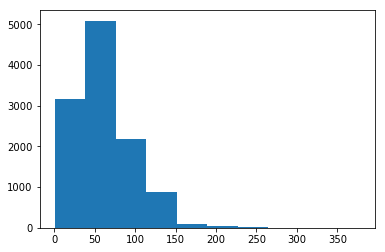

In [26]:
fig, ax = plt.subplots()

n, bins, patches = ax.hist(len_data.tolist())

fig.show()

#### Самые частые слова

Токенизируйте предложения на слова (nltk.word_tokenize)

In [27]:
from nltk import word_tokenize


all_text = [word_tokenize(line) for line in all_text]

In [28]:
from nltk import FreqDist


n_types = []
n_tokens = []
fd = FreqDist()
for line in all_text:
    fd.update(line)
    n_types.append(len(fd))
    n_tokens.append(sum(list(fd.values())))
for i in fd.most_common(10):
    print(i)

('.', 9439)
('(', 9258)
(')', 8716)
(',', 8268)
(':', 4719)
('не', 3023)
('!', 2895)
('и', 2388)
('в', 2329)
('я', 2321)


#### Закон Ципфа

В любом достаточно большом тексте ранг типа обратно пропорционален его частоте: f=a/r

f – частота типа, r – ранг типа, a – параметр, для славянских языков – около 0.07

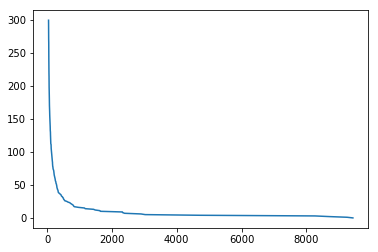

In [29]:
freqs = list(fd.values())
freqs = sorted(freqs, reverse = True)

fig, ax = plt.subplots()
ax.plot(freqs[:300], range(300))
plt.show()

#### Закон Хипса

С увеличением длины текста (количества токенов), количество типов увеличивается в соответствии с законом: |V|=K∗N^b

N – число токенов, |V| – количество типов в словаре, K,b – параметры, обычно K∈[10,100],b∈[0.4,0.6]

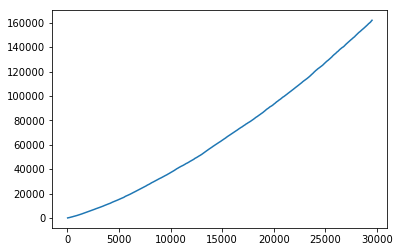

In [32]:
fig, ax = plt.subplots()
ax.plot(n_types, n_tokens)
plt.show()

### Подготовим данные для nltk.NaiveBayesClassifier

Классификатор принимает данные о предложении в виде словаря {"слово": #количество встреч в предожении}

Используйсте Counter. Пример работы:

Counter('abracadabra')

>Counter({'a': 5, 'b': 2, 'c': 1, 'd': 1, 'r': 2})

In [31]:
from collections import Counter

In [33]:
all_text = [Counter(line) for line in all_text]

### Обучим модель

In [35]:
from sklearn.metrics import accuracy_score
from nltk import NaiveBayesClassifier
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(all_text,
                                                    all_labels, test_size=0.1)

In [37]:
clf = NaiveBayesClassifier.train(zip(X_train, y_train))

### Протестируем качество классификации

In [38]:
pred = clf.classify_many(X_test)
accuracy_score(y_test, pred)

0.9267654751525719

# Добавим признаков

Для каждого примера добавим количество частей речи в нем. Если мы встретили знак пунктуации, то обозначим его как 'PNCT'.

In [40]:
import pymorphy2

In [41]:
morph = pymorphy2.analyzer.MorphAnalyzer()

Используйте pymorphy2.analyzer.MorphAnalyzer.parse

In [42]:
all_text_with_pos = []
for sample in all_text:
    update = Counter(sample)
    for word, count in sample.items():
        word_parsed = morph.parse(word)[0]
        pos = str(word_parsed.tag.POS)
        if not pos:
            pos = 'PNCT'
        update.update({pos: count})
        # if pos != 'PNCT':
        #    update.update({word_parsed.normal_form: count})
    all_text_with_pos.append(update)

In [44]:
print(all_text_with_pos[0])

Counter({'None': 6, 'CONJ': 5, 'NOUN': 3, ',': 2, 'NPRO': 2, 'хоть': 1, 'я': 1, 'и': 1, 'школота': 1, 'но': 1, 'поверь': 1, 'у': 1, 'нас': 1, 'то': 1, 'же': 1, 'самое': 1, ':': 1, 'D': 1, 'общество': 1, 'профилирующий': 1, 'предмет': 1, 'типа': 1, ')': 1, '.': 1, 'ADJS': 1, 'PREP': 1, 'PRCL': 1, 'ADJF': 1, 'PRTF': 1})


In [45]:
X_train, X_test, y_train, y_test = train_test_split(all_text_with_pos, all_labels, test_size=0.1)

In [46]:
clf = NaiveBayesClassifier.train(zip(X_train, y_train))

In [47]:
pred = clf.classify_many(X_test)
accuracy_score(y_test, pred)

0.92414995640802089

### Попробуем лемматизировать слова

Обучите тот же классификатор но на примерах, где все слова в нормальной форме.

In [ ]:
all_text_with_pos = []
for sample in all_text:
    update = Counter()
    for word, count in sample.items():
        <your code here>
    all_text_with_pos.append(update)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(all_text_with_pos, all_labels, test_size=0.1)
clf = NaiveBayesClassifier.train(zip(X_train, y_train))

pred = clf.classify_many(X_test)
accuracy_score(y_test, pred)

### Как изменилось качество? Почему?

# Часть 2. Использование знаний морфологии для генерации текста

Задание: написать шаблон вида: {person} {action} {count} {target}. Где

Person - лицо которое выполняет действие action. Каждое такое действие может быть в трех временах (настоящее, прошедшее и будущее). Действие выполняется с целью target. Такая цель - это некоторый объект или объекты числом count. count>0.

Используйте make_agree_with_number, parse и inflect из библиотеки pymorphy2.

Времена глаголов в документации pymorphy2: past (прошедшее), pres (настоящее), futr (будущее).

In [50]:
import pymorphy2
morph = pymorphy2.analyzer.MorphAnalyzer()

Согласование существительного с числом.

In [53]:
butyavka = morph.parse("бутявка")[0]
butyavka.make_agree_with_number(2)

Parse(word='бутявки', tag=OpencorporaTag('NOUN,inan,femn sing,gent'), normal_form='бутявка', score=1.0, methods_stack=((<DictionaryAnalyzer>, 'явки', 8, 1), (<UnknownPrefixAnalyzer>, 'бут')))

Чтобы поставить слово в нужную форму используется inflect

In [54]:
butyavka.inflect({'gent'})  # нет кого? (родительный падеж)

Parse(word='бутявки', tag=OpencorporaTag('NOUN,inan,femn sing,gent'), normal_form='бутявка', score=1.0, methods_stack=((<DictionaryAnalyzer>, 'явки', 8, 1), (<UnknownPrefixAnalyzer>, 'бут')))

In [55]:
butyavka.inflect({'plur', 'gent'})

Parse(word='бутявок', tag=OpencorporaTag('NOUN,inan,femn plur,gent'), normal_form='бутявка', score=1.0, methods_stack=((<DictionaryAnalyzer>, 'явок', 8, 8), (<UnknownPrefixAnalyzer>, 'бут')))

In [56]:
def genarate(person, action, time, count, target):
    # Поставьте action в нужное время
    action = morph.parse(action)[0].inflect({time}).word
    # Согласуйте target с числом
    target = morph.parse(target)[0].make_agree_with_number(count).word
    return "{person} {action} {count} {target}".format(person=person,
                                                       action=action,
                                                       count=count,
                                                       target=target)

In [60]:
genarate("Антон", "купить", "past", 5, "товар")

'Антон купил 5 товаров'

# Часть 3. Статистические морфологические анализаторы

### Загрузим данные из nltk.treebank

In [61]:
from nltk.corpus import treebank

In [62]:
sentences = treebank.tagged_sents()

In [63]:
print(sentences[0])

[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ('61', 'CD'), ('years', 'NNS'), ('old', 'JJ'), (',', ','), ('will', 'MD'), ('join', 'VB'), ('the', 'DT'), ('board', 'NN'), ('as', 'IN'), ('a', 'DT'), ('nonexecutive', 'JJ'), ('director', 'NN'), ('Nov.', 'NNP'), ('29', 'CD'), ('.', '.')]


### Выделим признаки

In [64]:
def features(sentence, index):
    return {
        'word': sentence[index],
        'is_first': index == 0,
        'is_last': index == len(sentence) - 1,
        'prefix-1': sentence[index][0],
        'prefix-2': sentence[index][:2],
        'prefix-3': sentence[index][:3],
        'suffix-1': sentence[index][-1],
        'suffix-2': sentence[index][-2:],
        'suffix-3': sentence[index][-3:],
        'prev_word': '' if index == 0 else sentence[index - 1],
        'next_word': '' if index == len(sentence) - 1 else sentence[index + 1],
        'is_all_lower': sentence[index].lower() == sentence[index],
        'is_first_cap': sentence[index][0] == sentence[index][0].upper()
    }

In [65]:
def untag(tagged_sentence):
    return [w for w, t in tagged_sentence]

In [66]:
# Split the dataset for training and testing
cutoff = int(.75 * len(sentences))
training_sentences = sentences[:cutoff]
test_sentences = sentences[cutoff:]


def transform_to_dataset(tagged_sentences):
    X, y = [], []
 
    for tagged in tagged_sentences:
        for index in range(len(tagged)):
            X.append(features(untag(tagged), index))
            y.append(tagged[index][1])
 
    return X, y
 
X, y = transform_to_dataset(training_sentences)

### В качестве классификатора используем DecisionTreeClassifier

In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import Pipeline


clf = Pipeline([
    ('vectorizer', DictVectorizer(sparse=False)),
    ('classifier', DecisionTreeClassifier(criterion='entropy'))
])


# Используем не все примеры (может не хватить оперативной памяти или долго обучаться)
clf.fit(X[:10000], y[:10000])

Pipeline(steps=[('vectorizer', DictVectorizer(dtype=<class 'numpy.float64'>, separator='=', sort=True,
        sparse=False)), ('classifier', DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'))])

In [70]:
X_test, y_test = transform_to_dataset(test_sentences)

In [71]:
clf.score(X_test[:100], y_test[:100])

0.88

### Классифицируем с помощью CRF

In [72]:
train, test = sentences[:-100], sentences[-100:]

In [ ]:
!pip install python-crfsuite

In [73]:
from nltk.tag import CRFTagger

In [74]:
ct = CRFTagger()

In [75]:
ct.train(train ,'model.crf.tagger')

In [76]:
ct.evaluate(test)

0.9566528458349038